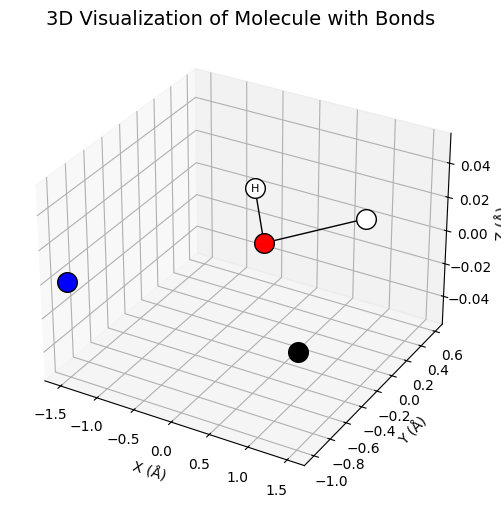

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def load_xyz(filename):
    """
    Load an XYZ file and return atomic symbols and coordinates.
    """
    with open(filename, 'r') as file:
        lines = file.readlines()
        num_atoms = int(lines[0].strip())  # Number of atoms (first line)
        symbols = []
        coordinates = []

        for line in lines[2:num_atoms + 2]:  # Skip the first two lines
            parts = line.split()
            symbols.append(parts[0])  # Atomic symbol
            coordinates.append([float(parts[1]), float(parts[2]), float(parts[3])])  # Coordinates
        
    return symbols, np.array(coordinates)

def calculate_bonds(coordinates, threshold=1.6):
    """
    Calculate bonds based on interatomic distances.
    A bond exists if the distance between two atoms is less than the threshold.
    """
    num_atoms = len(coordinates)
    bonds = []
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):  # Avoid double-counting
            distance = np.linalg.norm(coordinates[i] - coordinates[j])
            if distance < threshold:
                bonds.append((i, j))
    return bonds

def visualize_molecule_with_bonds(symbols, coordinates, bonds):
    """
    Visualize the molecule in 3D using matplotlib, including bonds.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Color map for atoms
    colors = {
        'H': 'white',
        'C': 'black',
        'O': 'red',
        'N': 'blue',
        # Add more elements as needed
    }

    # Plot atoms
    for idx, (symbol, coord) in enumerate(zip(symbols, coordinates)):
        x, y, z = coord
        ax.scatter(x, y, z, color=colors.get(symbol, 'gray'), s=200, label=symbol if idx == 0 else "", edgecolors='k')
        ax.text(x, y, z, symbol, fontsize=8, ha='center', va='center')

    # Plot bonds
    for i, j in bonds:
        x_coords = [coordinates[i][0], coordinates[j][0]]
        y_coords = [coordinates[i][1], coordinates[j][1]]
        z_coords = [coordinates[i][2], coordinates[j][2]]
        ax.plot(x_coords, y_coords, z_coords, color='black', linewidth=1)

    # Adjust plot
    ax.set_title("3D Visualization of Molecule with Bonds", fontsize=14)
    ax.set_xlabel("X (Å)")
    ax.set_ylabel("Y (Å)")
    ax.set_zlabel("Z (Å)")
    plt.show()

# Example usage
# Save this as "molecule.xyz" in the same directory
# Example content of "molecule.xyz":
# 5
# Water molecule
# O  0.0000  0.0000  0.0000
# H  0.7570  0.5860  0.0000
# H -0.7570  0.5860  0.0000
# C  1.5000 -1.0000  0.0000
# N -1.5000 -1.0000  0.0000

symbols, coordinates = load_xyz("molecule.xyz")
bonds = calculate_bonds(coordinates, threshold=1.2)  # Adjust threshold for bond length
visualize_molecule_with_bonds(symbols, coordinates, bonds)
